In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling


In [308]:
df = pd.read_csv("DovizDepo.csv", encoding = "windows-1254")

In [309]:
df.head()

,Tarih,Şimdi,Açılış,Yüksek,Düşük,Fark %,DovizTuru
0,05.07.2021,"10,29","10,3058","10,3292","10,2661","-0,17%",EUR-TRY
1,04.07.2021,"10,3071","10,3071","10,3278","10,2867","0,10%",EUR-TRY
2,02.07.2021,"10,297","10,2662","10,3301","10,2332","0,48%",EUR-TRY
3,01.07.2021,"10,248","10,3277","10,3441","10,2348","-0,68%",EUR-TRY
4,30.06.2021,"10,3182","10,3958","10,419","10,2581","-0,64%",EUR-TRY


In [4]:
pandas_profiling.ProfileReport(df)

In [310]:
df.tail()

,Tarih,Şimdi,Açılış,Yüksek,Düşük,Fark %,DovizTuru
21989,08.01.1990,"0,0023","0,0023","0,0023","0,0023","0,00%",USD-TRY
21990,05.01.1990,"0,0023","0,0023","0,0023","0,0023","0,00%",USD-TRY
21991,04.01.1990,"0,0023","0,0023","0,0023","0,0023","0,00%",USD-TRY
21992,03.01.1990,"0,0023","0,0023","0,0023","0,0023","0,00%",USD-TRY
21993,02.01.1990,"0,0023","0,0023","0,0023","0,0023","0,00%",USD-TRY


In [311]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21994 entries, 0 to 21993
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Tarih      21994 non-null  object
 1   Şimdi      21994 non-null  object
 2   Açılış     21994 non-null  object
 3   Yüksek     21994 non-null  object
 4   Düşük      21994 non-null  object
 5   Fark %     21994 non-null  object
 6   DovizTuru  21994 non-null  object
dtypes: object(7)
memory usage: 1.2+ MB


In [312]:
df.shape

(21994, 7)

In [313]:
df.Tarih = pd.to_datetime(df.Tarih,dayfirst=True)
# tarih sütununu datetime tipine çevirdik

In [314]:
df.set_index('Tarih', inplace=True)
# index olarak tarih sütunun atadık

In [315]:
df.sample(5)


,Şimdi,Açılış,Yüksek,Düşük,Fark %,DovizTuru
Tarih,,,,,,
2006-12-13,"1,3218","1,3282","1,329","1,3191","-0,47%",EUR-USD
2001-12-19,"1,3286","1,2988","1,3308","1,287","1,77%",EUR-TRY
2006-08-15,"1,454","1,4675","1,4821","1,453","-0,89%",USD-TRY
2015-06-08,"3,1068","2,9591","3,1197","2,9506","5,02%",EUR-TRY
1995-04-25,0,0,0,0,"0,00%",EUR-TRY


In [316]:
df.sort_index().head(10)
# indexleri küçükten büyüğe sıraladık

,Şimdi,Açılış,Yüksek,Düşük,Fark %,DovizTuru
Tarih,,,,,,
1990-01-02,"0,0023","0,0023","0,0023","0,0023","0,00%",USD-TRY
1990-01-02,0,0,0,0,"0,00%",EUR-TRY
1990-01-03,0,0,0,0,"0,00%",EUR-TRY
1990-01-03,"0,0023","0,0023","0,0023","0,0023","0,00%",USD-TRY
1990-01-04,"0,0023","0,0023","0,0023","0,0023","0,00%",USD-TRY
1990-01-04,0,0,0,0,"0,00%",EUR-TRY
1990-01-05,0,0,0,0,"0,00%",EUR-TRY
1990-01-05,"0,0023","0,0023","0,0023","0,0023","0,00%",USD-TRY
1990-01-08,0,0,0,0,"0,00%",EUR-TRY


In [317]:
df = df.loc['2000-01-02':'2020-12-31'].sort_index()
# 1990 ile 2000 yılları arasında ki verileri kullanmak istemiyoruz o yüzden 2000 yılı
# sonrasında yer alan verileri seçiyoruz.

In [318]:
columns = df.columns[:4]
columns
#  üzerinde aritmetik işlemler yapacağımız sütunları seçiyourz.

Index(['Şimdi', 'Açılış', 'Yüksek', 'Düşük'], dtype='object')

In [319]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16429 entries, 2000-01-03 to 2020-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Şimdi      16429 non-null  object
 1   Açılış     16429 non-null  object
 2   Yüksek     16429 non-null  object
 3   Düşük      16429 non-null  object
 4   Fark %     16429 non-null  object
 5   DovizTuru  16429 non-null  object
dtypes: object(6)
memory usage: 898.5+ KB


In [320]:
for i in columns:
    df[i] = df[i].str.replace(',','.')
# sütunların veri tipini float yapmak istediğimiz için "," karakterini "." ile değiştiriyoruz
# "," karakteri float dönüşümü için engel

In [321]:
for i in columns:
   df[i] = df[i].astype(float)
# işlem yapacağımız sütunları float yaptık.

In [323]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16429 entries, 2000-01-03 to 2020-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Şimdi      16429 non-null  float64
 1   Açılış     16429 non-null  float64
 2   Yüksek     16429 non-null  float64
 3   Düşük      16429 non-null  float64
 4   Fark %     16429 non-null  object 
 5   DovizTuru  16429 non-null  object 
dtypes: float64(4), object(2)
memory usage: 898.5+ KB


In [324]:
data = df.replace(0.0000, np.nan).dropna()

In [325]:
data.shape

(16429, 6)

In [326]:
df.shape

(16429, 6)

In [327]:
data.head(2)

,Şimdi,Açılış,Yüksek,Düşük,Fark %,DovizTuru
Tarih,,,,,,
2000-01-03,0.5535,0.5468,0.5546,0.5442,"1,28%",EUR-TRY
2000-01-03,0.5393,0.5407,0.5419,0.5393,"-0,57%",USD-TRY


In [329]:
euro = data[data.DovizTuru == 'EUR-TRY']  # euro kurlarını ele alalım

In [330]:
dolar = data[data.DovizTuru == 'USD-TRY']  # Dolar kurlarını ele alalım

In [331]:
dolar.head()

,Şimdi,Açılış,Yüksek,Düşük,Fark %,DovizTuru
Tarih,,,,,,
2000-01-03,0.5393,0.5407,0.5419,0.5393,"-0,57%",USD-TRY
2000-01-04,0.5363,0.5376,0.5382,0.5351,"-0,56%",USD-TRY
2000-01-05,0.5373,0.5367,0.5373,0.5345,"0,19%",USD-TRY
2000-01-06,0.5372,0.5361,0.5372,0.5343,"-0,02%",USD-TRY
2000-01-07,0.5392,0.5375,0.5399,0.5369,"0,37%",USD-TRY


In [332]:
euro.head()

,Şimdi,Açılış,Yüksek,Düşük,Fark %,DovizTuru
Tarih,,,,,,
2000-01-03,0.5535,0.5468,0.5546,0.5442,"1,28%",EUR-TRY
2000-01-04,0.5530,0.5519,0.5543,0.5486,"-0,09%",EUR-TRY
2000-01-05,0.5543,0.5520,0.5565,0.5514,"0,24%",EUR-TRY
2000-01-06,0.5546,0.5541,0.5571,0.5514,"0,05%",EUR-TRY
2000-01-07,0.5549,0.5543,0.5563,0.5513,"0,05%",EUR-TRY


In [333]:
euro.tail()

,Şimdi,Açılış,Yüksek,Düşük,Fark %,DovizTuru
Tarih,,,,,,
2020-12-25,9.2104,9.2374,9.2745,9.1672,"-0,21%",EUR-TRY
2020-12-28,9.0936,9.2217,9.2582,9.0410,"-1,27%",EUR-TRY
2020-12-29,9.0401,9.0975,9.1566,8.9887,"-0,59%",EUR-TRY
2020-12-30,9.0705,9.0470,9.0935,8.9521,"0,34%",EUR-TRY
2020-12-31,9.0767,9.0788,9.2115,9.0331,"0,07%",EUR-TRY


In [340]:
dolar.tail()

,Şimdi,Açılış,Yüksek,Düşük,Fark %,DovizTuru
Tarih,,,,,,
2020-12-25,7.5470,7.5801,7.6016,7.5305,"-0,37%",USD-TRY
2020-12-28,7.4416,7.5716,7.5756,7.4035,"-1,40%",USD-TRY
2020-12-29,7.3815,7.4466,7.4804,7.3376,"-0,81%",USD-TRY
2020-12-30,7.3774,7.3865,7.3993,7.3030,"-0,06%",USD-TRY
2020-12-31,7.4320,7.3815,7.4983,7.3444,"0,74%",USD-TRY


In [341]:
yıllık_euro_kur = euro.resample('Y').mean()
yıllık_euro_kur.head(3)
# yıllara göre euro kurunun ortalamaısnı aldık

,Şimdi,Açılış,Yüksek,Düşük
Tarih,,,,
2000-12-31,0.575372,0.574506,0.578038,0.571750
2001-12-31,1.103678,1.090382,1.129345,1.054906
2002-12-31,1.441045,1.434009,1.455806,1.416917


In [342]:
yıllık_dolar_kur = dolar.resample('Y').mean()


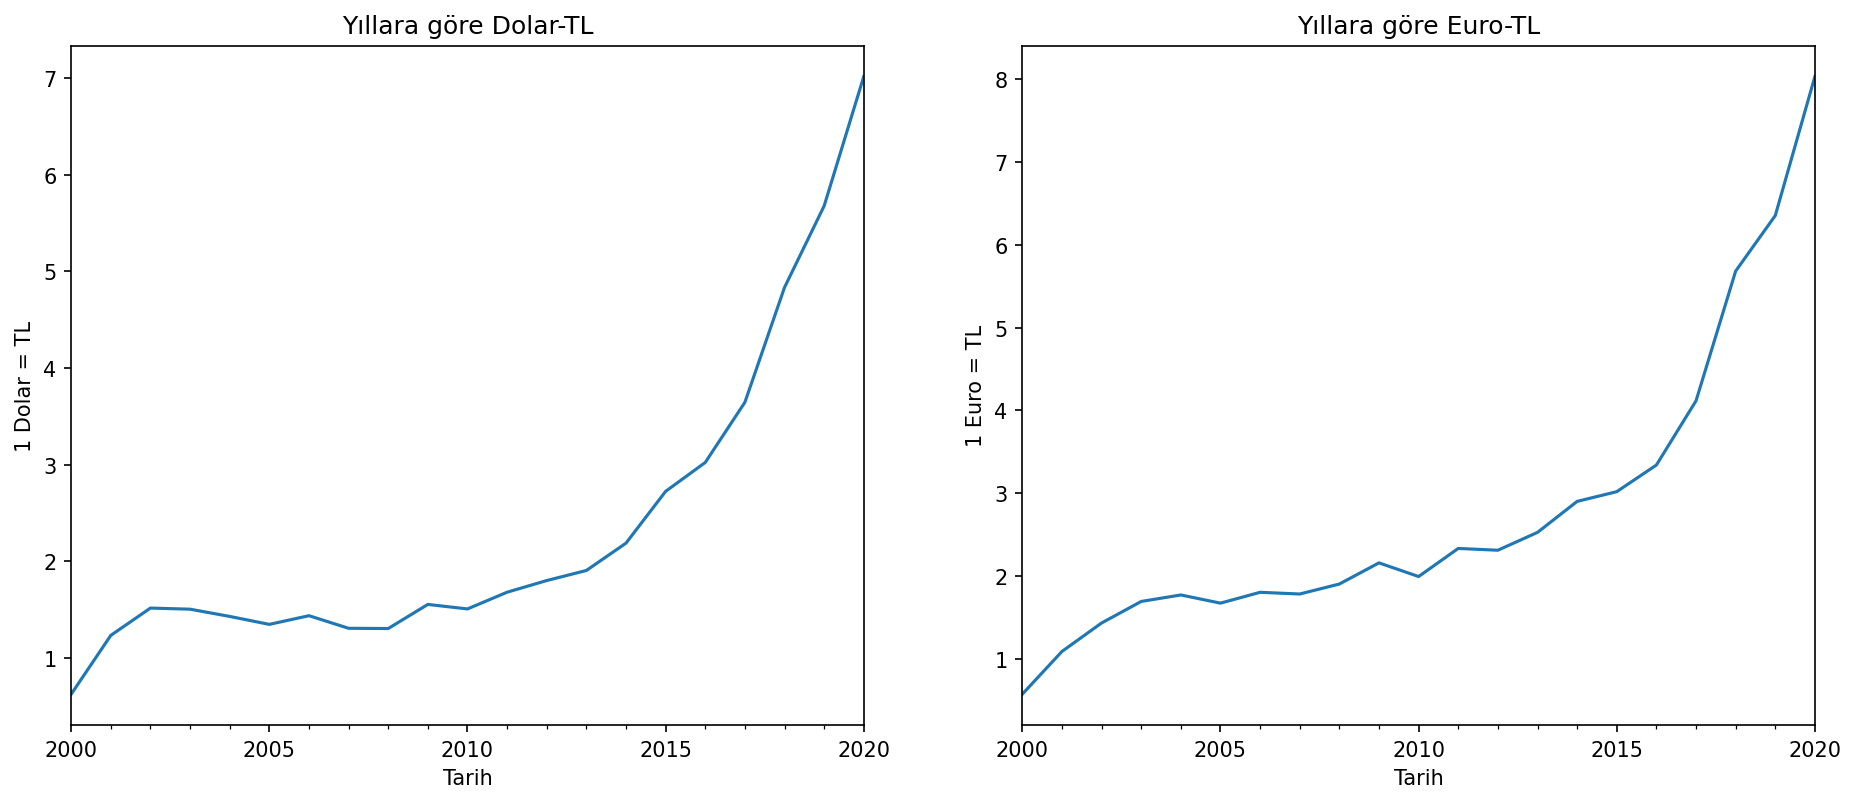

In [412]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (15,6), dpi = 150)
yıllık_dolar_kur.Açılış.plot.line(ax = ax[0])
ax[0].set_ylabel("1 Dolar = TL")
ax[0].set_title('Yıllara göre Dolar-TL');

yıllık_euro_kur.Açılış.plot.line(ax = ax[1])
ax[1].set_ylabel("1 Euro = TL")
ax[1].set_title('Yıllara göre Euro-TL');


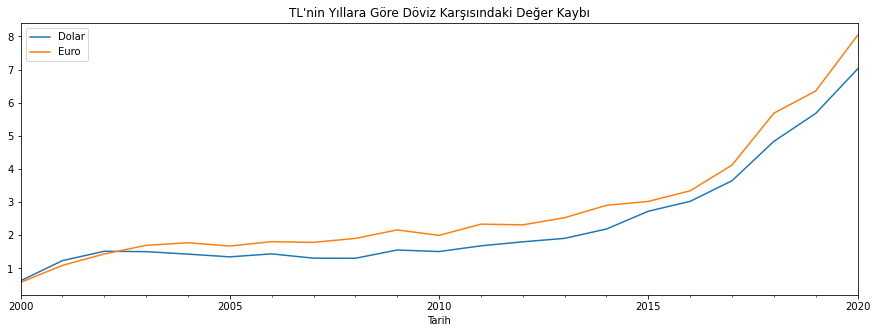

In [428]:

plt.figure(figsize = (15,5))
yıllık_dolar_kur.Açılış.plot(kind = "line", label = "Dolar")
yıllık_euro_kur.Açılış.plot(kind = "line", label = "Euro")
plt.title("TL'nin Yıllara Göre Döviz Karşısındaki Değer Kaybı")

plt.legend()
plt.show()


In [431]:
aylık_dolar_kur = dolar.resample('m').mean()

In [445]:
yıl_bazında = set(aylık_dolar_kur.index.strftime("%Y"))

In [450]:
yıl_bazında = list(yıl_bazında)
yıl_bazında.sort()
yıl_bazında

['2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020']

In [451]:
for i in yıl_bazında:
    aylık_dolar_kur[aylık_dolar_kur.index.strftime("%Y") == i].
    